1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la
sesión pasada.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df_muestra = pd.read_csv('subsample_JARB_demo.csv')

2. Importar su conjunto de funciones (2 puntos). Paraello deberás:
- Generar un archivo ancilliary_funcs.py para guardarlasfuncionescreadas
en la sesión pasada e importe.

- Utilizar las funciones creadas para inspeccionar la cantidaddecasosperdidos
de la muestra importada

In [16]:
from ancilliary_funcs import calcular_observaciones_perdidas, graficar_dotplot_variable

for columna in df_muestra.columns:
    cantidad_na, porcentaje_na, lista_na = calcular_observaciones_perdidas(df_muestra, columna, 
      True)

    print(f'La columna {columna} tiene un porcentaje de {porcentaje_na * 100} de NA')

La columna Unnamed: 0 tiene un porcentaje de 0 de NA
La columna undp_hdi tiene un porcentaje de 6.185567010309279 de NA
La columna ccodealp tiene un porcentaje de 0 de NA
La columna ht_region tiene un porcentaje de 0 de NA
La columna gle_cgdpc tiene un porcentaje de 1.0309278350515463 de NA
La columna imf_pop tiene un porcentaje de 22.68041237113402 de NA
La columna wef_imort tiene un porcentaje de 20.618556701030926 de NA
La columna who_alc2000 tiene un porcentaje de 10.309278350515463 de NA
La columna who_tobt tiene un porcentaje de 37.11340206185567 de NA
La columna wdi_exph tiene un porcentaje de 3.0927835051546393 de NA


3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la
menor cantidad de datos perdidos (o que no posea).
- Generar una nueva columna en la tabla de datos que contenga el puntajeZde
dicha variable. Recuerde que para calcular el puntaje z de una observación se
utiliza la fórmula:𝑧𝑖= ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)
- Paraordenarlosvalorespuedenutilizarlafunciónsort_values delDataFrame
analizado. Lean la documentación asociada al argumentoby.
- Asegúrense de eliminar las observaciones que tengan valores perdidos con
dropna. Lean la documentación asociada al argumentosubset.
- Seleccionen las primeras y últimas 10 observaciones de la base reordenada.
¿Qué características en común se encuentran?

In [17]:
# Debido a los resultados anteriores, se utilizara la variable continua gle_cgdpc para estimar
# el Z score

def calcular_z_un_valor(valor, media, std):
    return (valor - media) / std

media = df_muestra['gle_cgdpc'].mean()
std = df_muestra['gle_cgdpc'].std()
z_score_gle_cgdpc = [calcular_z_un_valor(valor, media, std) for valor in df_muestra['gle_cgdpc']]

df_muestra['z_score_gle_cgdpc'] = z_score_gle_cgdpc
df_muestra = df_muestra.sort_values(by='z_score_gle_cgdpc')
df_muestra = df_muestra.dropna(subset='z_score_gle_cgdpc')

primeros_diez = df_muestra.head(10)
ultimos_diez = df_muestra.tail(10)

display(primeros_diez)
display(ultimos_diez)

# Se puede ver que la mayoria de las observaciones con z scores similares pertenecen a una misma
# region! (En estos casos, de regiones SubSaharian y WesternDem)

,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,z_score_gle_cgdpc
96,52,0.678,SLV,LatAm,332.26999,NaN,13.600000,2.52,NaN,6.772403,-0.720675
32,97,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.200000,10.036333,-0.711897
67,39,0.498,COM,SubSaharian,972.35999,0.776000,NaN,0.12,15.300000,6.747643,-0.684661
72,154,0.431,SLE,SubSaharian,979.95001,6.232000,117.400002,3.78,34.400002,11.089902,-0.684234
50,106,0.438,MLI,SubSaharian,1063.26000,14.854000,79.599998,0.61,18.600000,6.862166,-0.679546
26,0,0.479,AFG,SouthAsia,1282.64000,29.825001,NaN,0.01,NaN,8.182274,-0.667203
25,180,0.488,UGA,SubSaharian,1343.45000,37.599998,45.400002,10.22,10.300000,7.222137,-0.663782
7,83,0.466,CIV,SubSaharian,1354.29000,22.524000,76.199997,3.15,NaN,5.716274,-0.663172
52,47,0.481,BEN,SubSaharian,1413.05000,10.320000,56.200001,1.40,8.800000,4.594296,-0.659866
8,185,0.519,TZA,SubSaharian,1416.30000,43.880001,37.700001,4.20,16.299999,5.580116,-0.659683


,Unnamed: 0,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,z_score_gle_cgdpc
3,37,NaN,TWN,EastAsia,33965.871,23.434000,3.934564,NaN,NaN,NaN,1.171674
70,59,0.894,FRA,WesternDem,34007.898,64.028000,3.400000,11.50,28.100000,11.539519,1.174039
89,30,0.919,CAN,WesternDem,36577.078,35.495998,4.700000,8.10,16.200001,10.449582,1.318590
34,167,0.909,SWE,WesternDem,39000.910,9.645000,2.300000,7.30,21.900000,11.929840,1.454964
76,64,0.924,DEU,WesternDem,39486.699,80.983002,3.400000,11.03,30.700001,11.297001,1.482296
37,148,NaN,SMR,WesternDem,42664.211,0.034000,NaN,NaN,NaN,6.129065,1.661074
75,80,0.920,IRL,WesternDem,46422.070,4.621000,3.400000,10.75,23.200001,7.783196,1.872505
42,168,0.938,CHE,WesternDem,50454.410,8.140000,3.700000,9.61,24.100000,11.659268,2.099379
82,99,0.911,LIE,WesternDem,102243.520,NaN,NaN,NaN,NaN,NaN,5.013223
57,111,NaN,MCO,WesternDem,108481.130,NaN,NaN,NaN,NaN,4.337683,5.364174


4. Estimar el puntaje z de las regiones (2 puntos). Utilizando el resultado anterior,
visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
-  Para ello realice un dotplot que muestre el valor promedio de su variable por
cada región.
-  Agregue además una línea que muestre el promedio total de la variable (es
decir, antes de agrupar).

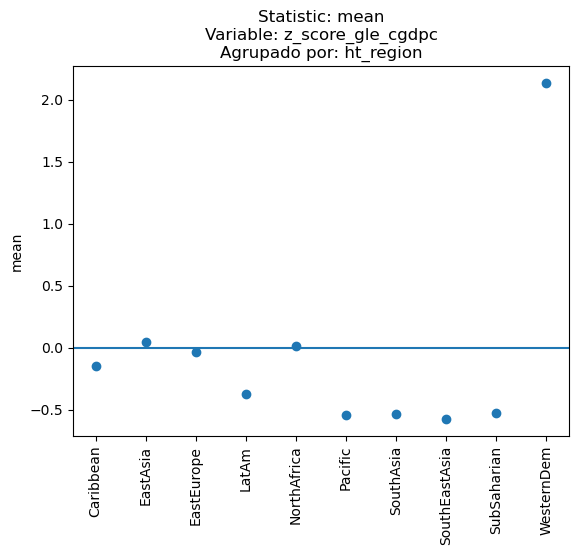

In [18]:
graficar_dotplot_variable(df_muestra, 'z_score_gle_cgdpc', 'ht_region', 'mean', True)

5. Generar curvas de Densidad de Probabilidad (2 puntos).
-  CreeunafunciónquepermitavisualizarlascurvasdeDensidaddeProbabilidad
para las variablesimf_pop,gle_cgdpc ywdi_exph.
-  La función debe contener como argumentos:
   -  df: Tabla de datos 1.
   -  variable: Variable a contrastar.

Se esta graficando la variable: imf_pop


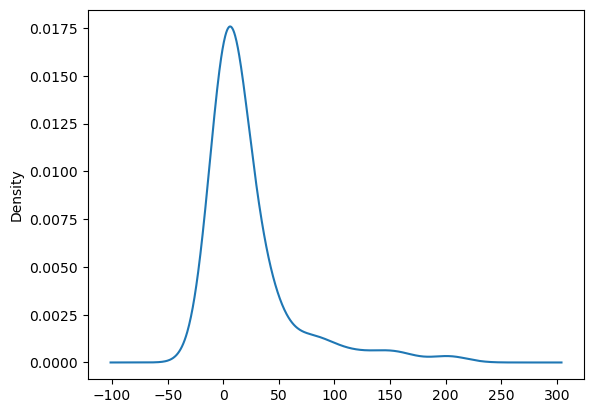

Se esta graficando la variable: gle_cgdpc


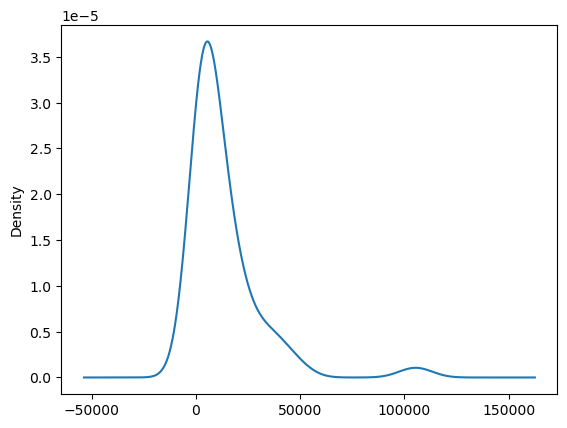

Se esta graficando la variable: wdi_exph


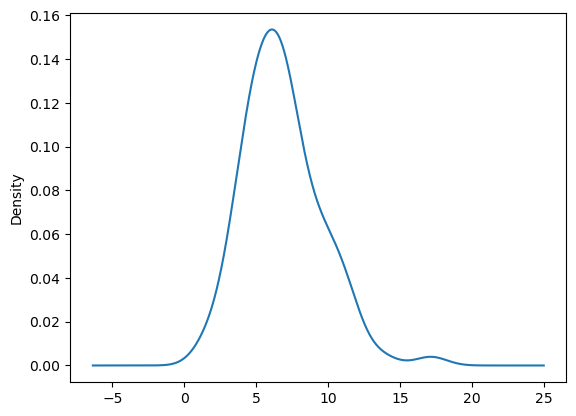

In [28]:
# Del enunciado entendi que se debe hacer una funcion que grafique la curva de densidad
# y que se itere esta funcion para graficar las 3 variables del enunciado

def graficar_curvas_de_densidad(df, variable):
    print(f'Se esta graficando la variable: {variable}')
    df[variable].plot.kde()
    plt.show()

columnas_a_graficar = ['imf_pop', 'gle_cgdpc', 'wdi_exph']
for variable in columnas_a_graficar:
    graficar_curvas_de_densidad(df_muestra, variable)